<a href="https://colab.research.google.com/github/isabelavs/alura-imersao-dados/blob/main/4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4: Machine Learning

In [2]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
provas = ["NU_NOTA_REDACAO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC"]

dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

In [25]:
provas_entrada = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()

notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

In [26]:
notas_entrada

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,435.6,512.3,488.6,420.0
2,423.2,499.1,441.0,560.0
3,426.2,578.1,551.5,500.0
4,516.5,571.3,511.2,780.0
5,559.6,618.7,607.5,900.0
...,...,...,...,...
127373,480.4,501.5,485.3,520.0
127375,502.4,559.6,525.7,740.0
127376,449.1,380.9,450.3,520.0
127378,564.7,416.2,517.3,620.0


In [27]:
x = notas_entrada
y = notas_saida

In [28]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25,
                                                        random_state=SEED)

In [29]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [34]:
predicoes_mt = modelo.predict(x_teste)

In [35]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

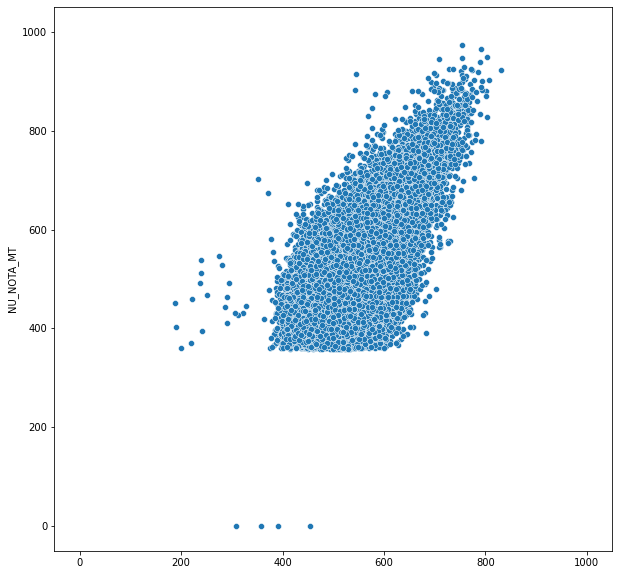

In [38]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = predicoes_mt, y = y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

(-550.0, 550.0)

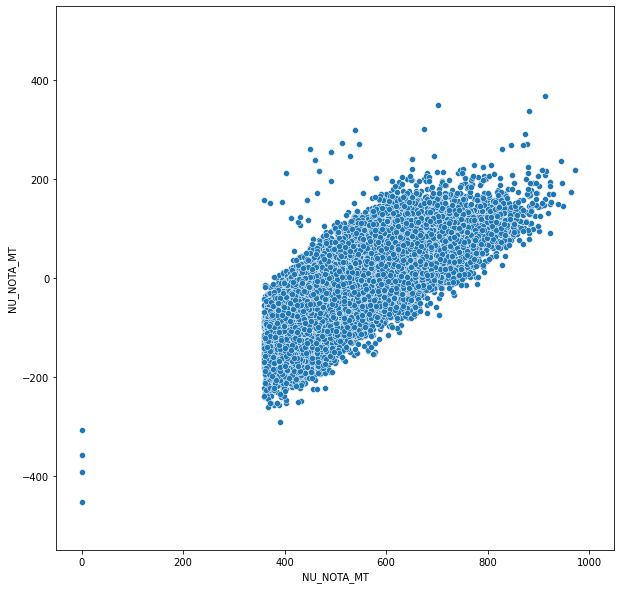

In [42]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = y_teste, y = y_teste - predicoes_mt)
plt.xlim((-50, 1050))
plt.ylim((-550, 550))

(-50.0, 1050.0)

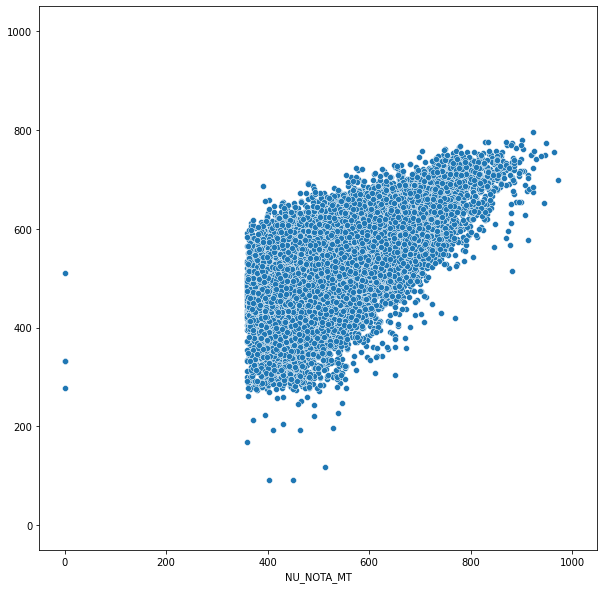

In [45]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = y_teste, y = x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [56]:
resultados = pd.DataFrame()
resultados["real"] = y_teste
resultados["previsao"] = predicoes_mt
resultados["diferenca"] = resultados["real"] - resultados["previsao"]
resultados["quadrado_diferenca"] = (resultados["real"] - resultados["previsao"])**2

In [57]:
resultados

,real,previsao,diferenca,quadrado_diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [58]:
resultados["quadrado_diferenca"].mean()

6604.415306219525

In [59]:
resultados["quadrado_diferenca"].mean()**(1/2)

81.26755383435338

In [60]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
predicoes_dummy = modelo_dummy.predict(x_teste)

In [63]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_dummy)

12063.645588509502

In [67]:
mean_squared_error(y_teste, predicoes_mt)

6604.415306219566

Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula.

Desafio 02: Ler a documentação do Dummy e alterar o método de regressão.

Desafio 03: Buscar outra métrica para avaliar modelos de regressão.